### Unemployment Analysis in India

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### In this data we have 6 Columns:
#### Region (28 Regions).
#### Date. (From 31th May 2019 to 30th June 2020).
#### Frequency (Monthly).
#### Estimated Unemployment Rate (%).
#### Estimated Employed.
#### Estimated Labour Participation Rate (%).
#### Area (Urban or Rural).

In [2]:
df = pd.read_csv("Unemployment in India.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### This data has 28 nulls on each column so we will have to remove them.

In [3]:
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

### Everything seems fine except the date which needs to be in a datetime not object.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


### Removing the nulls.

In [5]:
df.dropna(inplace=True)

### Summary statistics.

In [6]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


### This data has 28 regions.

In [7]:
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

### There's a problem here there's a space before 'Monthly' so we will have to remove that space.

In [8]:
df[' Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

### We used the 'lstrip()' function to remove the space.

In [9]:
df[' Frequency'] = df[' Frequency'].str.lstrip()

### Now everything is fine.

In [10]:
df[' Frequency'].unique()

array(['Monthly'], dtype=object)

In [11]:
df['Area'].unique()

array(['Rural', 'Urban'], dtype=object)

In [12]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


### Converting the date from object to datetime.

In [13]:
df[' Date'] = pd.to_datetime(df[' Date'])

C:\Users\YAHOO COMPUTER PC\AppData\Local\Temp\ipykernel_2784\1649268658.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] = pd.to_datetime(df[' Date'])


### Now it's in a datetime format.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    740 non-null    object        
 1    Date                                     740 non-null    datetime64[ns]
 2    Frequency                                740 non-null    object        
 3    Estimated Unemployment Rate (%)          740 non-null    float64       
 4    Estimated Employed                       740 non-null    float64       
 5    Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                      740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


### Urban areas are slightly more than Rural areas.

In [15]:
df['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

### Splitting the data to regions in the Urban areas.

In [16]:
df_urban = df[df['Area'] == 'Urban']

### Now we do the same with Rural areas.

In [17]:
df_rural = df[df['Area'] == 'Rural']

### The reason why it's like this is because we take 28 iterations of the same date but with different unemployment rates.

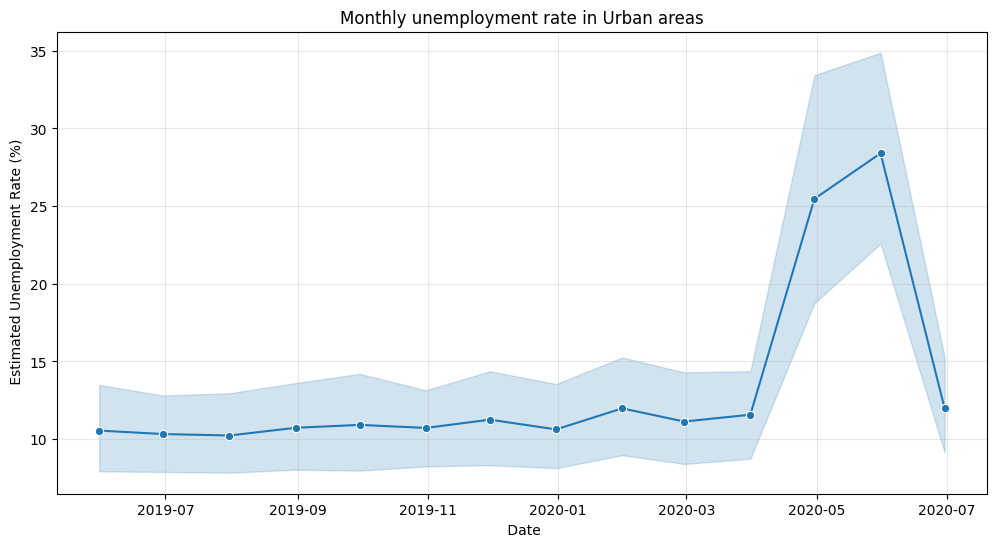

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_urban, x= ' Date', y= ' Estimated Unemployment Rate (%)', marker='o')
plt.title('Monthly unemployment rate in Urban areas')
plt.grid(alpha=0.3)
plt.show()


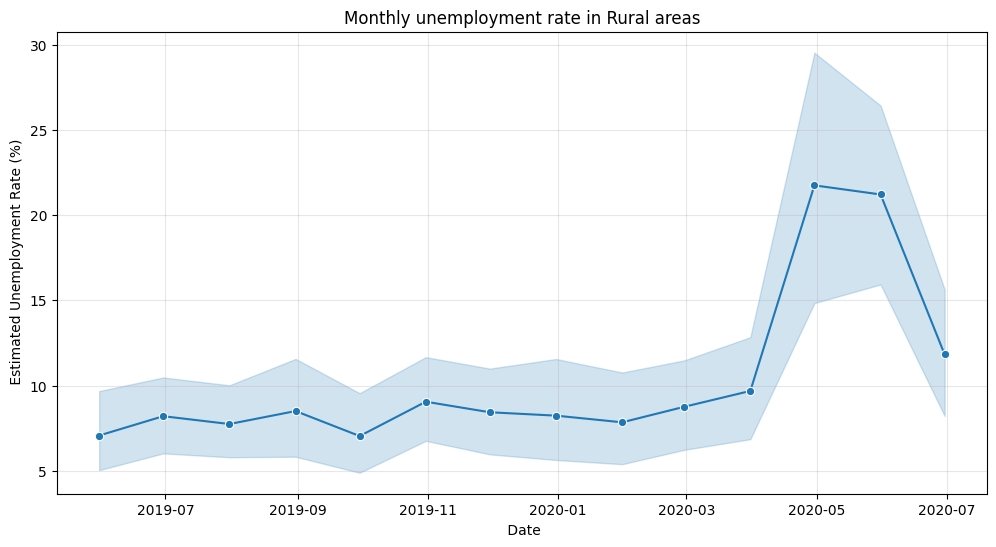

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_rural, x= ' Date', y= ' Estimated Unemployment Rate (%)', marker='o')
plt.title('Monthly unemployment rate in Rural areas')
plt.grid(alpha=0.3)
plt.show()

### Unemployment rate distribution for Urban and Rural Areas.

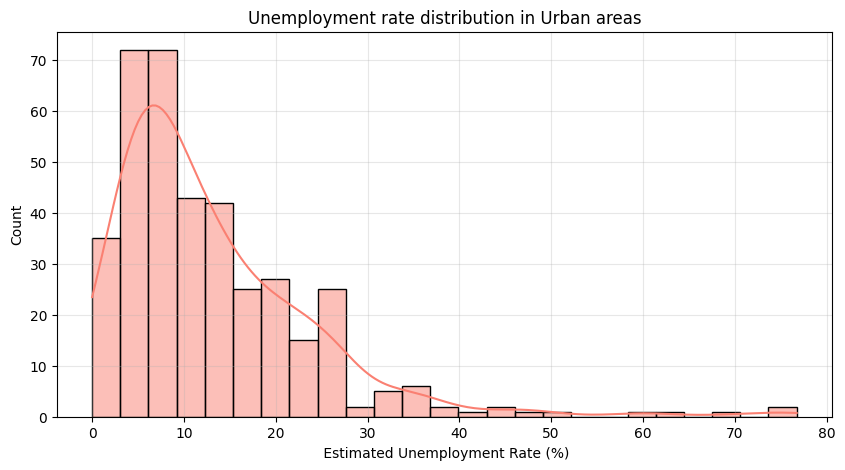

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(data= df_urban, x= ' Estimated Unemployment Rate (%)', bins=25, kde=True, color='salmon', edgecolor = 'black')
plt.title('Unemployment rate distribution in Urban areas')
plt.grid(alpha=0.3)
plt.show()

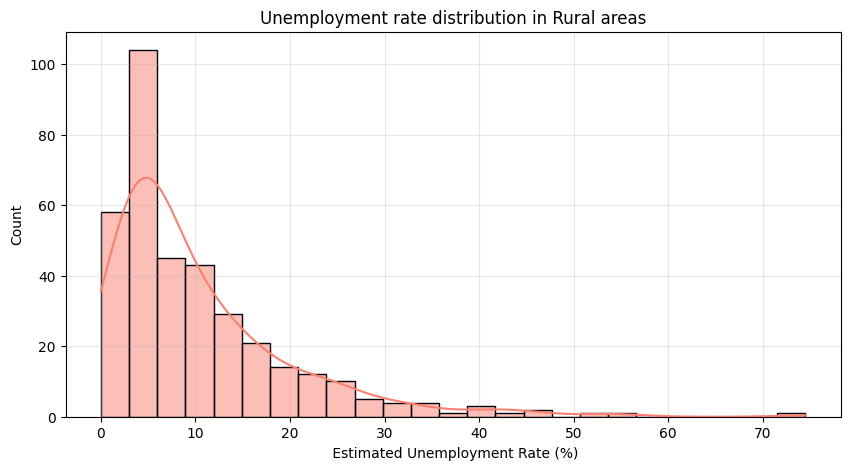

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(data= df_rural, x= ' Estimated Unemployment Rate (%)', bins=25, kde=True, color='salmon', edgecolor = 'black')
plt.title('Unemployment rate distribution in Rural areas')
plt.grid(alpha=0.3)
plt.show()

### To fix the problem of the line chart we will group by each date and we will take the maximum Unemployment rate.

In [22]:
df_date_grouped = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].max().to_frame()
df_date_grouped

,Estimated Unemployment Rate (%)
Date,
2019-05-31,34.69
2019-06-30,26.64
2019-07-31,25.81
2019-08-31,33.45
2019-09-30,33.57
2019-10-31,27.54
2019-11-30,27.27
2019-12-31,33.48
2020-01-31,34.37


### The final line chart after the group by:

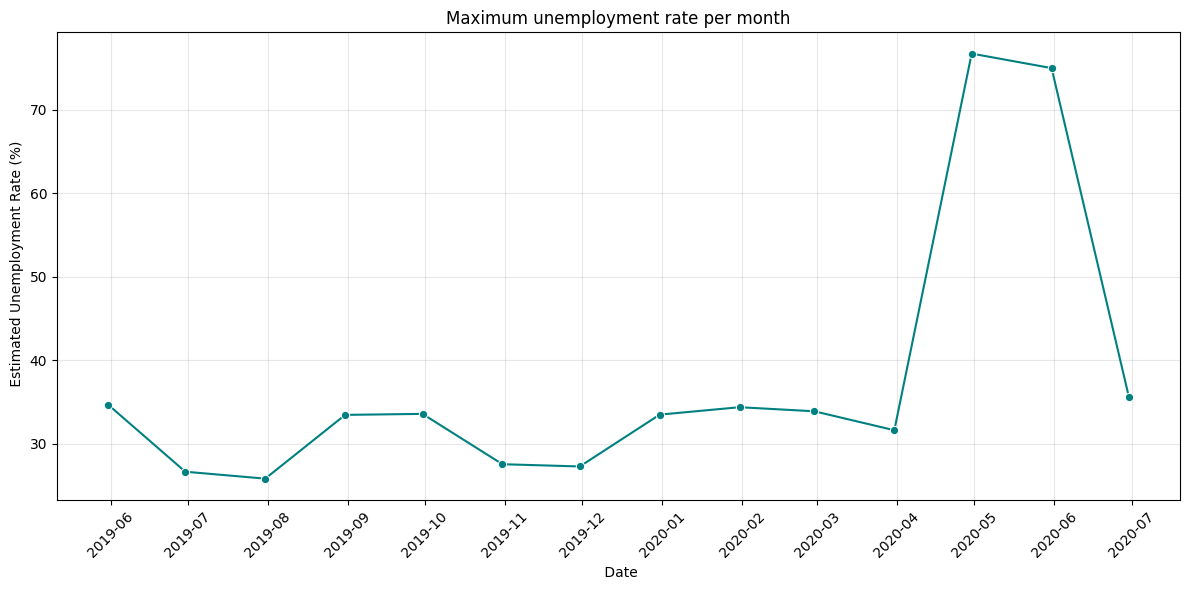

In [23]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_date_grouped, x=' Date', y=' Estimated Unemployment Rate (%)', 
             marker='o', color='teal')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.title("Maximum unemployment rate per month")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Maximum Unemployment Rate.

In [24]:
max(df[' Estimated Unemployment Rate (%)'])

76.74

### The region with the Maximum unemployment rate:

In [25]:
df.groupby('Region')[' Estimated Unemployment Rate (%)'].max().sort_values(ascending=False).to_frame().head(1)

,Estimated Unemployment Rate (%)
Region,
Puducherry,76.74
